<a href="https://colab.research.google.com/github/Cousar/Colab-codes-for-TE-project/blob/main/TEfittingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

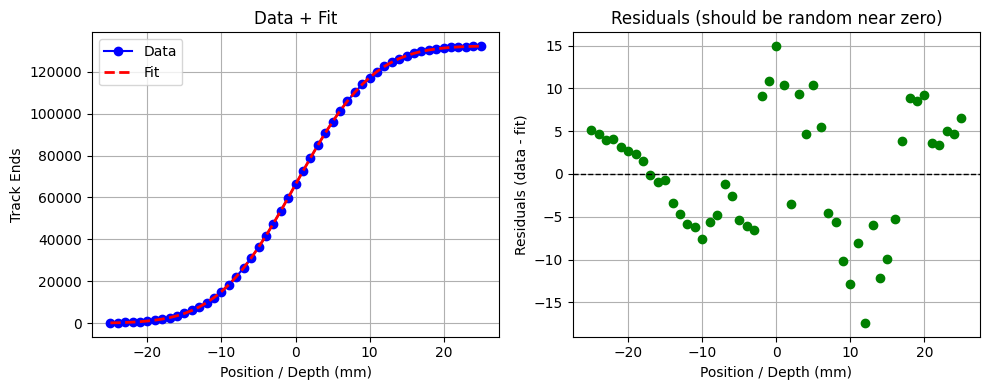

Best parameters:
B (half max): 66161
sigma (spot size): 8.31 mm
mu (shift): -0.00 mm
D (offset): 2
R^2: 1.0000


In [22]:
#100 MeV
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

# YOUR DATA HERE - paste comma-separated rows
xdata = np.array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])  # Paste yours
ydata = np.array([180, 262, 378, 541, 764, 1067, 1472, 2005, 2696, 3581, 4698, 6083, 7781, 9831, 12271, 15131, 18440, 22208, 26441, 31120, 36222, 41709, 47523, 53611, 59863, 66208, 72544, 78779, 84862, 90669, 96159, 101255, 105921, 110145, 113903, 117203, 120065, 122492, 124551, 126241, 127628, 128747, 129640, 130336, 130868, 131273, 131570, 131793, 131957, 132073, 132157])        # Paste yours

# IMPROVED MODEL with shift (mu) + offset (D)
def my_model_v2(x, B, sigma, mu, D):
    return B * (1 + erf( (x - mu) / (sigma * np.sqrt(2)) )) + D

# Fit it
popt, pcov = curve_fit(my_model_v2, xdata, ydata,
                       p0=[66000, 8.11, 0, 0],
                       bounds=([0, 0, -5, 0],    # Min: B=0,σ=0,μ=-5,D=0
                               [1e6, 20, 5, 100])) # Max: B=1M,σ=20,μ=5,D=100

# Plot data + fit
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_fit = my_model_v2(xdata, *popt)
plt.plot(xdata, ydata, 'bo-', label='Data')
plt.plot(xdata, y_fit, 'r--', linewidth=2, label='Fit')
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Track Ends')
plt.title('Data + Fit')
plt.legend()
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = ydata - y_fit
plt.plot(xdata, residuals, 'go', markersize=6)
plt.axhline(0, color='k', ls='--', linewidth=1)
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Residuals (data - fit)')
plt.title('Residuals (should be random near zero)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Results
print("Best parameters:")
print(f"B (half max): {popt[0]:.0f}")
print(f"sigma (spot size): {popt[1]:.2f} mm")
print(f"mu (shift): {popt[2]:.2f} mm")
print(f"D (offset): {popt[3]:.0f}")
print(f"R^2: {1 - np.sum(residuals**2)/np.sum((ydata - np.mean(ydata))**2):.4f}")


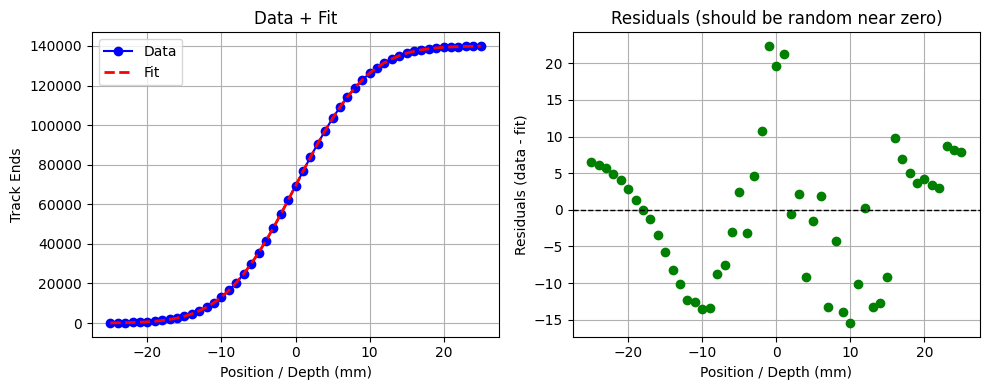

Best parameters:
B (half max): 69981
sigma (spot size): 7.67 mm
mu (shift): 0.09 mm
D (offset): 0
R^2: 1.0000


In [21]:
#110 MeV
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

# YOUR DATA HERE - paste comma-separated rows
xdata = np.array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])  # Paste yours
ydata = np.array([81.48, 124.06, 188.19, 283.12, 421.50, 619.38, 897.82, 1283.64, 1808.79, 2510.04, 3432.13, 4623.89, 6139.00, 8031.32, 10357.04, 13163.79, 16496.29, 20389.32, 24851.39, 29887.29, 35472.19, 41549.46, 48077.69, 54955.46, 62086.96, 69337.23, 76603.22, 83734.34, 90662.16, 97242.21, 103418.12, 109096.66, 114215.21, 118789.74, 122772.06, 126202.38, 129108.24, 131528.94, 133484.50, 135066.80, 136319.41, 137308.25, 138045.64, 138599.42, 139008.02, 139305.98, 139517.30, 139665.70, 139773.88, 139842.88, 139888.92
])        # Paste yours

# IMPROVED MODEL with shift (mu) + offset (D)
def my_model_v2(x, B, sigma, mu, D):
    return B * (1 + erf( (x - mu) / (sigma * np.sqrt(2)) )) + D

# Fit it
popt, pcov = curve_fit(my_model_v2, xdata, ydata,
                       p0=[69000, 7.46, 0, 0],
                       bounds=([0, 0, -5, 0],    # Min: B=0,σ=0,μ=-5,D=0
                               [1e6, 20, 5, 100])) # Max: B=1M,σ=20,μ=5,D=100

# Plot data + fit
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_fit = my_model_v2(xdata, *popt)
plt.plot(xdata, ydata, 'bo-', label='Data')
plt.plot(xdata, y_fit, 'r--', linewidth=2, label='Fit')
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Track Ends')
plt.title('Data + Fit')
plt.legend()
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = ydata - y_fit
plt.plot(xdata, residuals, 'go', markersize=6)
plt.axhline(0, color='k', ls='--', linewidth=1)
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Residuals (data - fit)')
plt.title('Residuals (should be random near zero)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Results
print("Best parameters:")
print(f"B (half max): {popt[0]:.0f}")
print(f"sigma (spot size): {popt[1]:.2f} mm")
print(f"mu (shift): {popt[2]:.2f} mm")
print(f"D (offset): {popt[3]:.0f}")
print(f"R^2: {1 - np.sum(residuals**2)/np.sum((ydata - np.mean(ydata))**2):.4f}")


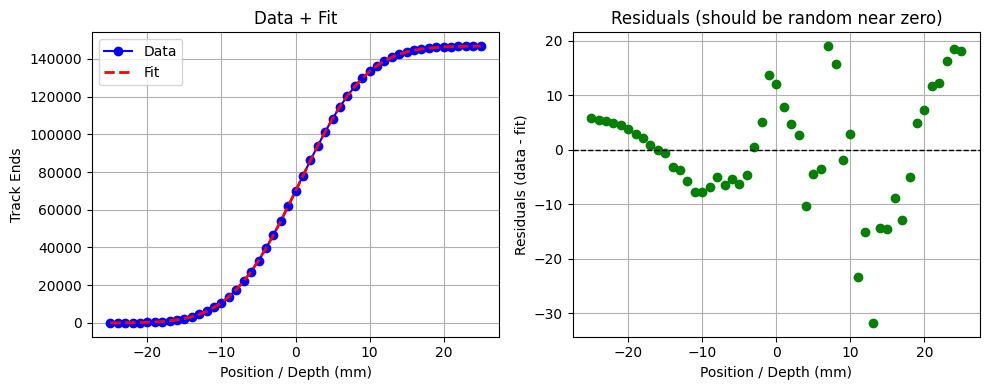

Best parameters:
B (half max): 73372
sigma (spot size): 7.19 mm
mu (shift): 0.42 mm
D (offset): 1
R^2: 1.0000


In [20]:
#120 MeV
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

# YOUR DATA HERE - paste comma-separated rows
xdata = np.array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])  # Paste yours
ydata = np.array([36.80, 56.73, 88.64, 139.07, 216.87, 334.50, 509.35, 764.30, 1128.05, 1638.38, 2339.96, 3283.49, 4533.17, 6151.63, 8210.09, 10779.38, 13923.08, 17695.37, 22131.10, 27253.88, 33051.50, 39492.47, 46511.80, 54010.11, 61871.84, 69942.32, 78076.41, 86121.41, 93925.83, 101339.97, 108276.71, 114621.96, 120340.36, 125353.17, 129668.13, 133343.72, 136367.97, 138862.83, 140834.11, 142410.58, 143609.45, 144519.91, 145185.45, 145679.19, 146035.20, 146279.22, 146449.19, 146560.84, 146638.11, 146687.72, 146717.45
])        # Paste yours

# IMPROVED MODEL with shift (mu) + offset (D)
def my_model_v2(x, B, sigma, mu, D):
    return B * (1 + erf( (x - mu) / (sigma * np.sqrt(2)) )) + D

# Fit it
popt, pcov = curve_fit(my_model_v2, xdata, ydata,
                       p0=[70000, 6.97, 0, 0],
                       bounds=([0, 0, -5, 0],    # Min: B=0,σ=0,μ=-5,D=0
                               [1e6, 20, 5, 100])) # Max: B=1M,σ=20,μ=5,D=100

# Plot data + fit
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_fit = my_model_v2(xdata, *popt)
plt.plot(xdata, ydata, 'bo-', label='Data')
plt.plot(xdata, y_fit, 'r--', linewidth=2, label='Fit')
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Track Ends')
plt.title('Data + Fit')
plt.legend()
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = ydata - y_fit
plt.plot(xdata, residuals, 'go', markersize=6)
plt.axhline(0, color='k', ls='--', linewidth=1)
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Residuals (data - fit)')
plt.title('Residuals (should be random near zero)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Results
print("Best parameters:")
print(f"B (half max): {popt[0]:.0f}")
print(f"sigma (spot size): {popt[1]:.2f} mm")
print(f"mu (shift): {popt[2]:.2f} mm")
print(f"D (offset): {popt[3]:.0f}")
print(f"R^2: {1 - np.sum(residuals**2)/np.sum((ydata - np.mean(ydata))**2):.4f}")


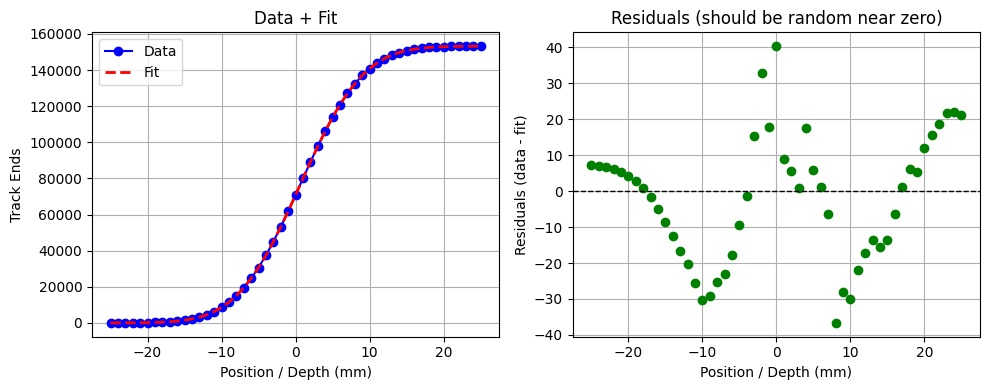

Best parameters:
B (half max): 76611
sigma (spot size): 6.69 mm
mu (shift): 0.63 mm
D (offset): 0
R^2: 1.0000


In [19]:
#130 MeV
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

# YOUR DATA HERE - paste comma-separated rows
xdata = np.array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])  # Paste yours
ydata = np.array([16.9922123, 24.79214478, 38.42235565, 61.33252335, 99.64609528, 161.5068665, 260.0835571, 412.7875671, 644.710083, 988.7636108, 1488.228394, 2196.797119, 3179.852783, 4514.101074, 6281.246094, 8573.574219, 11485.54785, 15097.03906, 19471.60547, 24659.24219, 30675.11328, 37493.17578, 45059.28906, 53262.17969, 61925.41016, 70946.67969, 80040.39844, 89086.10938, 97857.5625, 106197.7109, 113906.4609, 120904.75, 127109.7266, 132468.7188, 137049.7031, 140841.3906, 143927.7656, 146375.4219, 148274.4844, 149711.2813, 150780.9688, 151563.0938, 152120.5938, 152507.4688, 152766.0313, 152944.7188, 153060.3125, 153134.2031, 153181.3125, 153208.2813, 153223.2969
])        # Paste yours

# IMPROVED MODEL with shift (mu) + offset (D)
def my_model_v2(x, B, sigma, mu, D):
    return B * (1 + erf( (x - mu) / (sigma * np.sqrt(2)) )) + D

# Fit it
popt, pcov = curve_fit(my_model_v2, xdata, ydata,
                       p0=[71000, 6.47, 0, 0],
                       bounds=([0, 0, -5, 0],    # Min: B=0,σ=0,μ=-5,D=0
                               [1e6, 20, 5, 100])) # Max: B=1M,σ=20,μ=5,D=100

# Plot data + fit
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_fit = my_model_v2(xdata, *popt)
plt.plot(xdata, ydata, 'bo-', label='Data')
plt.plot(xdata, y_fit, 'r--', linewidth=2, label='Fit')
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Track Ends')
plt.title('Data + Fit')
plt.legend()
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = ydata - y_fit
plt.plot(xdata, residuals, 'go', markersize=6)
plt.axhline(0, color='k', ls='--', linewidth=1)
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Residuals (data - fit)')
plt.title('Residuals (should be random near zero)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Results
print("Best parameters:")
print(f"B (half max): {popt[0]:.0f}")
print(f"sigma (spot size): {popt[1]:.2f} mm")
print(f"mu (shift): {popt[2]:.2f} mm")
print(f"D (offset): {popt[3]:.0f}")
print(f"R^2: {1 - np.sum(residuals**2)/np.sum((ydata - np.mean(ydata))**2):.4f}")


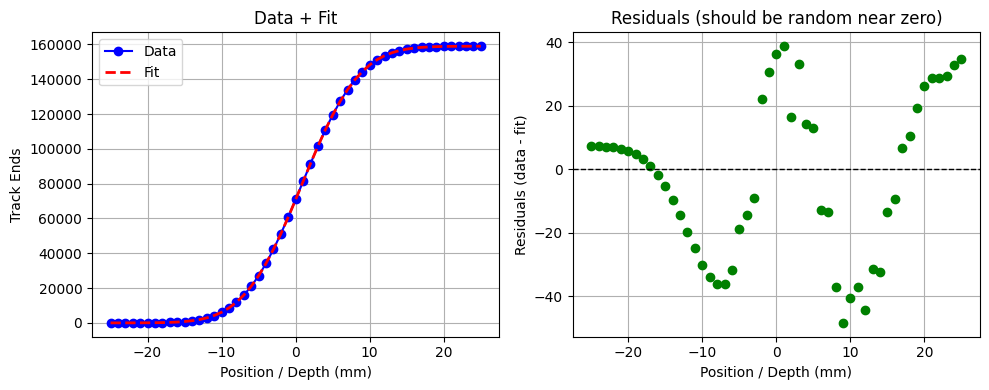

Best parameters:
B (half max): 79487
sigma (spot size): 6.13 mm
mu (shift): 0.83 mm
D (offset): 0
R^2: 1.0000


In [23]:
#140 MeV
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

# YOUR DATA HERE - paste comma-separated rows
xdata = np.array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])  # Paste yours
ydata = np.array([9.344292641, 11.3297472, 15.15503883, 22.38563347, 35.68636703, 59.48371887, 101.0546188, 171.7664948, 288.3327637, 476.8206177, 772.0626221, 1222.785767, 1893.075195, 2862.636963, 4228.217773, 6099.951172, 8599.4375, 11847.39551, 15957.65332, 21022.60742, 27103.625, 34193.33984, 42254.39453, 51204.83984, 60830, 70931.875, 81256.42188, 91510.38281, 101489.8281, 110875.9609, 119520.7031, 127234.9453, 133981.4844, 139685.1875, 144408.375, 148227.2031, 151217.7969, 153490.4531, 155198.0156, 156423.9375, 157307.3125, 157904.5469, 158317.25, 158579.3125, 158751.5156, 158859.4063, 158922.7031, 158958.2188, 158979, 158993.7813, 159001.7344])        # Paste yours

# IMPROVED MODEL with shift (mu) + offset (D)
def my_model_v2(x, B, sigma, mu, D):
    return B * (1 + erf( (x - mu) / (sigma * np.sqrt(2)) )) + D

# Fit it
popt, pcov = curve_fit(my_model_v2, xdata, ydata,
                       p0=[77720, 5.92, 0, 0],
                       bounds=([0, 0, -5, 0],    # Min: B=0,σ=0,μ=-5,D=0
                               [1e6, 20, 5, 100])) # Max: B=1M,σ=20,μ=5,D=100


# Plot data + fit
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_fit = my_model_v2(xdata, *popt)
plt.plot(xdata, ydata, 'bo-', label='Data')
plt.plot(xdata, y_fit, 'r--', linewidth=2, label='Fit')
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Track Ends')
plt.title('Data + Fit')
plt.legend()
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals = ydata - y_fit
plt.plot(xdata, residuals, 'go', markersize=6)
plt.axhline(0, color='k', ls='--', linewidth=1)
plt.xlabel('Position / Depth (mm)')
plt.ylabel('Residuals (data - fit)')
plt.title('Residuals (should be random near zero)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Results
print("Best parameters:")
print(f"B (half max): {popt[0]:.0f}")
print(f"sigma (spot size): {popt[1]:.2f} mm")
print(f"mu (shift): {popt[2]:.2f} mm")
print(f"D (offset): {popt[3]:.0f}")
print(f"R^2: {1 - np.sum(residuals**2)/np.sum((ydata - np.mean(ydata))**2):.4f}")


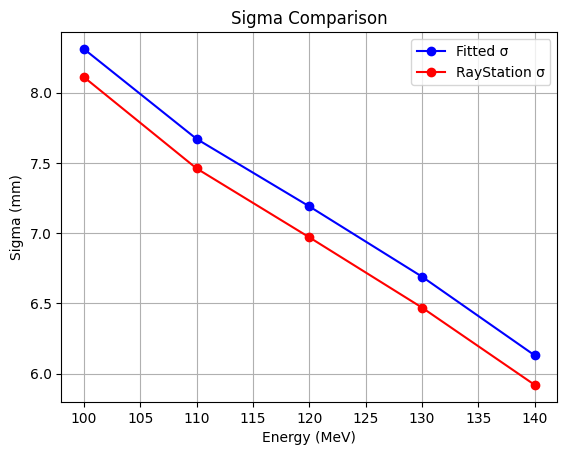

In [14]:
energies = np.array([100,110,120,130,140])
fit_sigmas = np.array([8.31,7.67,7.19,6.69,6.13])
ray_sigmas = np.array([8.11,7.46,6.97,6.47,5.92])

plt.plot(energies, fit_sigmas, 'bo-', label='Fitted σ')
plt.plot(energies, ray_sigmas, 'ro-', label='RayStation σ')
plt.xlabel('Energy (MeV)')
plt.ylabel('Sigma (mm)')
plt.title('Sigma Comparison')
plt.legend()
plt.grid(True)
plt.show()


Constant bias correction: σ_true = σ_fit - 0.21 mm
Corrected sigmas: [8.098 7.458 6.978 6.478 5.918]


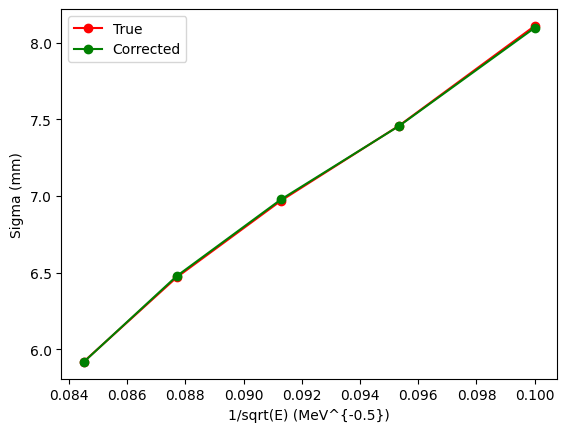

In [15]:
energies = np.array([100,110,120,130,140])
fit_sigmas = np.array([8.31,7.67,7.19,6.69,6.13])
true_sigmas = np.array([8.11,7.46,6.97,6.47,5.92])

bias = fit_sigmas - true_sigmas  # ~[0.20,0.21,0.22,0.22,0.21]
k = np.mean(bias)  # 0.21 mm
corrected_sigmas = fit_sigmas - k

print(f"Constant bias correction: σ_true = σ_fit - {k:.2f} mm")
print("Corrected sigmas:", corrected_sigmas)

# Plot physics trend: σ vs 1/sqrt(E)
plt.plot(1/np.sqrt(energies), true_sigmas, 'ro-', label='True')
plt.plot(1/np.sqrt(energies), corrected_sigmas, 'go-', label='Corrected')
plt.xlabel('1/sqrt(E) (MeV^{-0.5})')
plt.ylabel('Sigma (mm)')
plt.legend()
plt.show()
